베이지안 통계학 중간과제  
202485-010007 김동현

1. Pareto(a, b) 분포의 누적분포함수는 다음과 같을 때,
<img src="https://latex.codecogs.com/svg.image?F(x)=1-\left (\frac{b}{x} \right)^{a},\;\;\; x\geq b>0, a>0">
역함수를 구하고, a=b=2일 때 역함수방법을 사용하여 난수를 발생시키는 코드를 작성하고 그림을 그려 실제분포와 비교하시오.

역함수방법을 사용하려면 파레토 분포의 누적분포함수의 역함수를 구해야 한다.

역함수를 구하기 위해서 <img src="https://latex.codecogs.com/svg.image?F(x)=u">를 만족하는 x를 구한다.

<img src="https://latex.codecogs.com/svg.image?u=1-\left(\frac{b}{x} \right)^a"><br>
<img src="https://latex.codecogs.com/svg.image?\left(\frac{b}{x} \right)^a=1-u"><br>
<img src="https://latex.codecogs.com/svg.image?\frac{b}{x}=(1-u)^{1/a}"><br>
<img src="https://latex.codecogs.com/svg.image?x=\frac{b}{(1-u)^{1/a}}">

따라서 역함수는 다음과 같다.
<img src="https://latex.codecogs.com/svg.image?F^{-1}(u)=\frac{b}{(1-u)^{1/a}}">


In [240]:
# a=b=2 입력
a=2; b=2

# 역함수를 활용하여 u를 Pareto 분포의 난수로 변환하는 함수
inv_fun = function(u, a, b) {
    return (b / ((1-u)^(1/a)))
}

# 0~1 사이 난수 생성
u = runif(100000, 0, 1)
x = inv_fun(u, a, b)

summary(u)
summary(x)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000106 0.2485537 0.4987710 0.4986647 0.7471634 0.9999987 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   2.000    2.307    2.825    4.008    3.978 1784.656 

Warning message:
"Removed 3939 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."


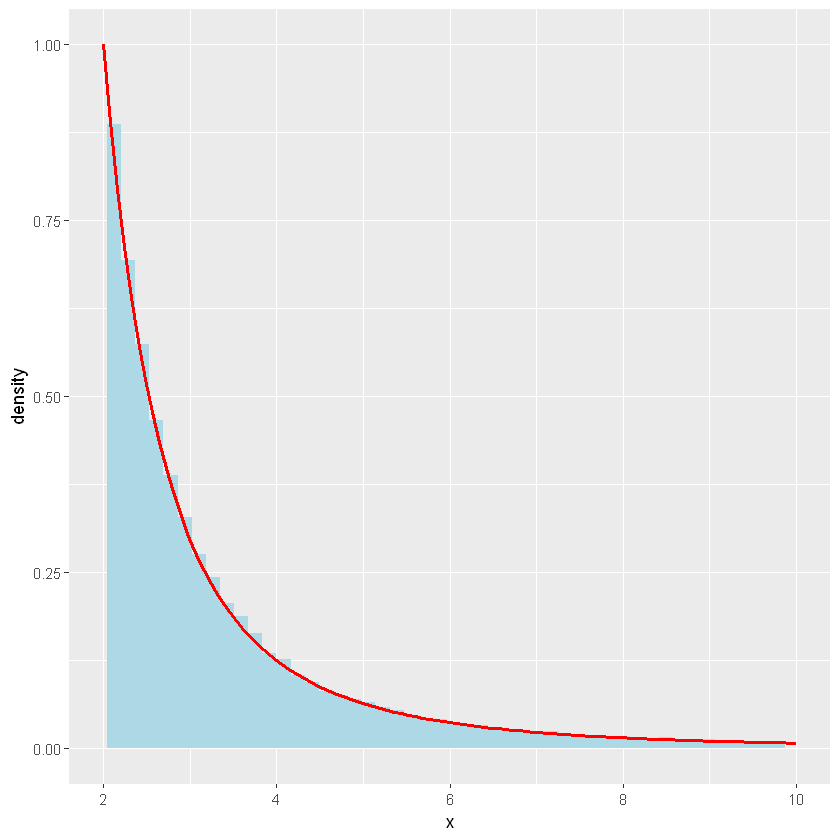

In [241]:
library(ggplot2)

data_x = data.frame(x)
ggplot(data_x, aes(x=x)) +
    xlim(2, 10) + ylim(0, 1) +
    geom_histogram(aes(y=..density..), bins=50, fill="light blue") + 
    stat_function(fun=function(x) ifelse(x >= b, (a * b^a) / x^(a+1),0), color="red", size=1)
    

2. 합격불합격방법을 사용하여 Beta(3,2)에서 1000개의 난수를 발생시키는 코드를 작성하고 그림을 그려 실제분포와 비교하시오.

In [242]:
# Beta(3,2) 분포에서 1000개의 난수 발생시키기
y1 = rbeta(1000, 3, 2)

y1_data = data.frame(y1=y1)

# 실제 Beta(3,2) 분포의 x, y값 만들기
x2 = seq(0, 1, length.out = 1000)
y2 = dbeta(x2, 3, 2)

y2_data = data.frame(x2=x2, y2=y2)

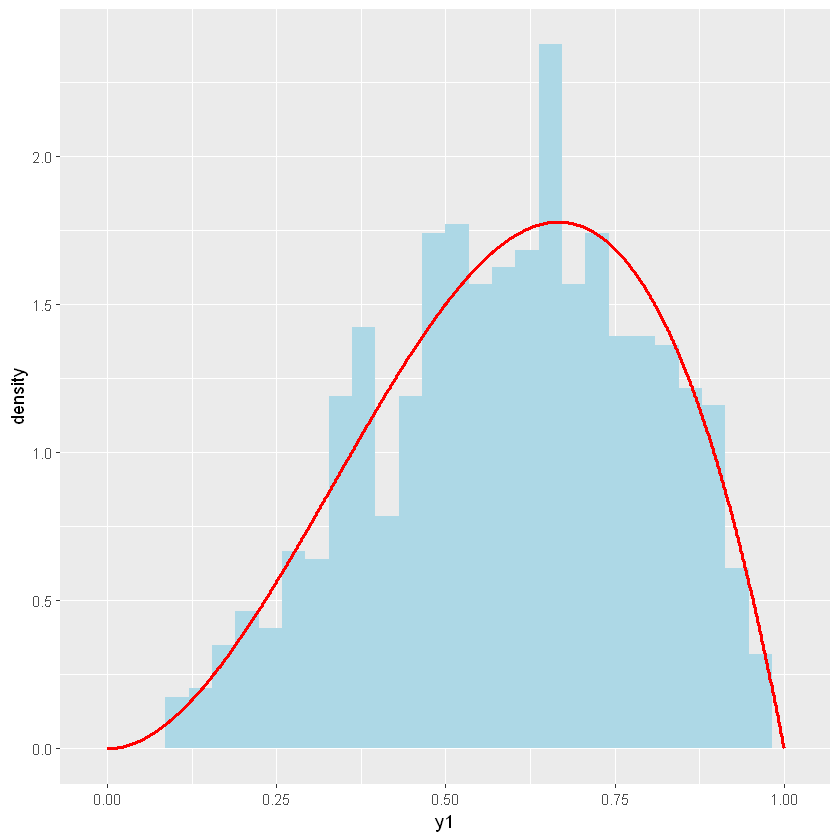

In [243]:
ggplot() +
    geom_histogram(data=y1_data, aes(x=y1, y=..density..), bins=30, fill="lightblue") +
    geom_line(data=y2_data, aes(x=x2, y=y2), color="red", size=1)

3. 아래의 적분 값을 몬테카를로 방법으로 계산하시오.

<img src="https://latex.codecogs.com/svg.image?\theta=\int_{1}^{2}\frac{e^{-x^2/2}}{\sqrt{2\pi}}dx">


In [244]:
# (1 ~ 2) 구간에서 n개의 균등분포 난수 생성
n = 1000
x = runif(n, 1, 2)

# 각각의 x 값에 대하여 y 값 계산
y = (exp(-x^2/2))/sqrt(2*pi)

# 적분의 근사값 계산
approx = (2-1)*mean(y)

cat("적분의 근사값:", approx, "\n")
cat("정확한 값:", pnorm(2)-pnorm(1),"\n")
cat("정확한 값과의 차이:", pnorm(2)-pnorm(1)-approx)


적분의 근사값: 0.1358655 
정확한 값: 0.1359051 
정확한 값과의 차이: 3.960567e-05

4. 정규분포 <img src="https://latex.codecogs.com/svg.image?y_1,\cdots,y_n\sim N(0,\theta)">의 분산 <img src="https://latex.codecogs.com/svg.image?\theta">를 베이지안 방법으로 추정하기 위해 다음의 감마사전분포를 생각하자.

<img src="https://latex.codecogs.com/svg.image?\theta^{-1}\sim Gamma(a,b)">

- 참고: 감마밀도함수
<img src="https://latex.codecogs.com/svg.image?f(\theta^{-1})=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}(\theta^{-1})^{a-1}e^{b/\theta}">

- 참고: 정규밀도함수
<img src="https://latex.codecogs.com/svg.image?f(y)=\frac{\sqrt{\theta}}{\sqrt{2\pi}}e^{-\frac{\theta}{2}(y)^2}">

(a) 몬테카를로 방법을 이용하여 분산의 사후평균 <img src="https://latex.codecogs.com/svg.image?\mathbb{E}(\theta|y_1,\cdots,y_n)">을 계산하는 알고리즘을 작성하시오.

분산의 사후분포 p(θ|y)는 베이즈 정리에 따라 다음과 같이 표현할 수 있다.
<img src="https://latex.codecogs.com/svg.image?p(\theta|y)\propto p(y|\theta)\cdot p(\theta)">

[1] 가능도함수 구하기

주어진 정규밀도함수는 다음과 같습니다.<br>
<img src="https://latex.codecogs.com/svg.image?f(y|\theta)=\frac{\sqrt{\theta}}{\sqrt{2\pi}}e^{-\frac{\theta}{2}(y)^2}">

n개의 관측값에 대한 우도함수는 다음과 같이 표현됩니다.<br>
<img src="https://latex.codecogs.com/svg.image?p(y|\theta)=\prod_{i=1}^{n}f(y_i|\theta)=\left( \frac{\sqrt{\theta}}{\sqrt{2\pi}}\right)^n\cdot e^{-\frac{\theta}{2}{y_i}^2}"> 이고,

이것을 정리하면<br>
<img src="https://latex.codecogs.com/svg.image?p(y|\theta)\propto \theta^{n/2}\cdot e^{-\frac{\theta}{2}\sum_{i=1}^{n}{y_i}^2}">

[2] 사전분포: 역감마함수

주어진 역감마분포는 다음과 같이 표현할 수 있습니다.<br>
<img src="https://latex.codecogs.com/svg.image?p(\theta)\propto \theta^{-(a+1)}\cdot e^{b/\theta">

[3] 사후분포 <img src="https://latex.codecogs.com/svg.image?\propto"> 가능도함수 × 사전분포<br>
<img src="https://latex.codecogs.com/svg.image?p(\theta|y)\propto p(y|\theta)\cdot p(\theta)"><br>
<img src="https://latex.codecogs.com/svg.image?\propto\left(\theta^{n/2}\cdot e^{-\frac{\theta}{2}\sum_{i=1}^{n}{y_i}^2}\right)\left(\theta^{-(a+1)}\cdot e^{b/\theta}\right)"><br>
<img src="https://latex.codecogs.com/svg.image?\propto\theta^{(n/2)-(a+1)}\cdot e^{-(\frac{b+\frac{1}{2}\sum_{i=1}^{n}y_i^2}{\theta})}">

이 식을 역감마분포의 형태로 표현하면<br>
<img src="https://latex.codecogs.com/svg.image?\theta|y\sim Inv-Gamma(a+\frac{n}{2}, b+\frac{1}{2}\sum_{i=1}^{n}y_i^2)">

참고로, n의 값이 커질수록 θ에 대한 사후분포의 효과가 사전분포를 압도한다.


(b) <img src="https://latex.codecogs.com/svg.image?\theta=2, n=500"> 으로 가정한 후, 데이터를 생성하고 (a)에서 작성한 알고리즘을 바탕으로 <img src="https://latex.codecogs.com/svg.image?\theta">의 추정치를 R을 활용하여 계산하시오.

In [245]:
# 주어진 쎄타값(분산)과 n 값 변수
theta_given = 2
n_given = 500

# y: y_1 ~ y_n 을 생성한다.
y = rnorm(n_given, mean=0, sd=sqrt(theta_given))

# 사전분포의 파라미터 설정: 0.5 ~ 5 사이에서 랜덤하게
a = runif(1, 0.5, 5)
b = runif(1, 0.5, 5)
cat("랜덤 생성된 a:", a, "\n")
cat("랜덤 생성된 b:", b, "\n")

# 가능도함수에 기반한 사후분포의 모수 계산
a2 = a + n/2
b2 = b + 0.5*sum(y^2)

# 사후평균 계산
mean2 = b2 / (a2-1)

# 몬테카를로 방법
theta_samples = 1/rgamma(10000, shape=a2, rate=b2)

# 추정치 출력
cat("사후평균추정치:", mean2, "\n")
cat("몬테카를로방법을 통한 사후평균:", mean(theta_samples), "\n")


사후평균추정치: 1.030352 
몬테카를로방법을 통한 사후평균: 1.029468 
